# Load and process the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
import seaborn as sns

In [3]:
data  = pd.read_csv("downloads/Historical Product Demand.csv")
data.head(10)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
5,Product_0979,Whse_J,Category_028,2012/4/19,500
6,Product_0979,Whse_J,Category_028,2012/6/5,500
7,Product_0979,Whse_J,Category_028,2012/6/27,500
8,Product_0979,Whse_J,Category_028,2012/7/23,500
9,Product_0979,Whse_J,Category_028,2012/8/29,500


# Data Exploration 

In [4]:
data.shape

(1048575, 5)

In [5]:
data.describe()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,1048575,1048575,1048575,1037336,1048575
unique,2160,4,33,1729,3828
top,Product_1359,Whse_J,Category_019,2013/9/27,1000
freq,16936,764447,481099,2075,112682


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1048575 non-null  object
 1   Warehouse         1048575 non-null  object
 2   Product_Category  1048575 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB


# Data Cleaning

In [7]:
data.isnull().sum
data['Date']=pd.to_datetime(data['Date'],errors='coerce')
data.Date.sort_values().unique()[:10]
data.index=pd.to_datetime(data.index)
data

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
1970-01-01 00:00:00.000000000,Product_0993,Whse_J,Category_028,2012-07-27,100
1970-01-01 00:00:00.000000001,Product_0979,Whse_J,Category_028,2012-01-19,500
1970-01-01 00:00:00.000000002,Product_0979,Whse_J,Category_028,2012-02-03,500
1970-01-01 00:00:00.000000003,Product_0979,Whse_J,Category_028,2012-02-09,500
1970-01-01 00:00:00.000000004,Product_0979,Whse_J,Category_028,2012-03-02,500
...,...,...,...,...,...
1970-01-01 00:00:00.001048570,Product_1791,Whse_J,Category_006,2016-04-27,1000
1970-01-01 00:00:00.001048571,Product_1974,Whse_J,Category_006,2016-04-27,1
1970-01-01 00:00:00.001048572,Product_1787,Whse_J,Category_006,2016-04-28,2500
1970-01-01 00:00:00.001048573,Product_0901,Whse_J,Category_023,2016-10-07,50


# Data Visualization

<Axes: xlabel='Warehouse', ylabel='count'>

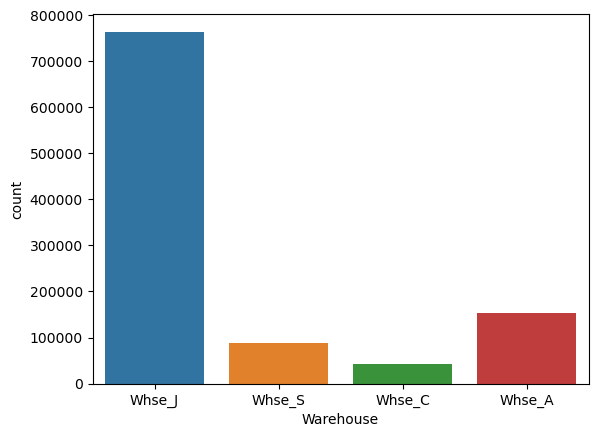

In [8]:
sns.countplot(x='Warehouse',data=data)

In [9]:
warehouse_Demand=data.groupby('Warehouse')['Order_Demand'].sum()
warehouse_Demand

Warehouse
Whse_A    50 6000 5000 6000 3900 2100 5000 200 100 100 1...
Whse_C    2000 2000 5000 2000 5000 6000 10000 2000 1000 ...
Whse_J    100 500 500 500 500 500 500 500 500 500 500 50...
Whse_S    3000 5000 15000 2000 100 300 200 2000 2000 500...
Name: Order_Demand, dtype: object

In [ ]:
# Average Demand
demand=data["Order_Demand"].mean()
demand

In [ ]:
# Step 2: Linear Programming Model

In [ ]:
# Total Demand
initial_inventory=data["Order_Demand"].sum()
initial_inventory

In [ ]:
# maximum inventory
max_inventory=initial_inventory*2
max_inventory

In [ ]:
# Example holding cost per unit day
holding_cost=2
# Example ordering cost per order
ordering_cost=50
# no of days to hold inventory
holding_days=30
# Cost function
c=[holding_cost*holding_days+ordering_cost]
c

In [ ]:
A=[[-1],[1]]
B=[-demand,max_inventory-initial_inventory]
bounds=[[0,None]]

# Solving Optimization Problem

In [ ]:
x=linprog(c,A_ub=A,b_ub=B,bounds=bounds)
x

In [ ]:
#Optimal order quantity
optimal_order_quantity=x.x[0]
total_cost=x.fun
optimal_order_quantity

# Sensitivity Analysis

In [ ]:
# 20% increase in demand
demand_change=1.2
# 20% decrease in demand
holding_cost_change=0.8
# 50% increase in lead time
lead_time_change=1.5

In [ ]:
new_demand=demand*demand_change
new_holding_cost=holding_cost*holding_cost_change
new_lead_time=holding_days*holding_cost_change

In [ ]:
new_demand

In [ ]:
new_holding_cost

In [ ]:
new_lead_time

In [ ]:
def sensitivity_analysis(demand_change,holding_cost_change,lead_time_change):
    new_demand=demand*demand_change
    new_holding_cost=holding_cost*holding_cost_change
    new_lead_time=holding-days*holding_cost_change
    new_c=[new_holding_cost+ordering_cost]
    new_b=[inew_demand,max_inventory-initial_inventory]
    new_x=linprog(new_c,A_ub=A,b_ub=new_b,bounds=bounds)
    new_optimal_order_quabtity=new_x.x[0]
    new_total_cost=new_x.fun
    print("New optimal order quantity : ",new_optimal_order_quantity)
    print("New total cost : ",new_total_cost)
    return new_optimal_order_quantity,new_total_cost
    

In [ ]:
optimal_order_quantity_sensitivity,total_cost_sensitivity=sensitivity_analysis(demand_change,holding_cost_change,lead_time_change)


In [ ]:
print("Sensitivity Analysis :")
print("Optimal order (Sensitivity):",optimal_order_quantity_sensitivity)
print("Total cost Sensitivity : ",total_cost_sensitivity)

In [ ]:
labels=['original',"Sensitivity"]
total_costs=[total_cost,total_cost_sensitivity]
plt.bar(labels,total_costs,color=['pink','purple'])
plt.xlabel("Scenario")
plt.ylabel("Total Cost")
plt.title("Total Cost Comparison")
plt.show()

In [ ]:
labels=['Original','Sensitivity']
optimal_orders=[optimal_order_quantity,optimal_order_quantity_sensitivity]
plt.bar(labels,optimal_orders,color=(['pink','purple']))
plt.xlabel("Scenario")
plt.ylabel("Optimal Orders")
plt.title("optimal order comparison")
plt.show()